# Final Project
## Anna Callahan & Steven Delcarson

### For our final project, we looked at a dataframe of shootings recorded from across the country since 2013. We ran multiple analyses on the data in order to test different hypotheses. Our ultimate goal was to explore potential indicators of shooting patterns in the country, because we felt it would be helpful for safer gun regulation in the future. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
guns = pd.read_csv('stage3.csv')

#### In order to analyze the relationship between gun type and the recorded shootings, we first cleaned the gun_type column in order to get the names of each gun, free of the other symbols in each string.

In [3]:
# get rid of any NaN's included in the gun_type column, and save the cleaned column into a new dataframe
guns_clean = guns["gun_type"].dropna()
guns_dict = {"Guns" : np.array(guns_clean)}
guns_df = pd.DataFrame(guns_dict)

In [4]:
# split the string in each row of the guns column by the "|" figure and collect the appropriate element into an 
# array of all the guns
index = 0
guns_arr = []
for x in guns_df["Guns"]:
    guns_split = guns_df["Guns"][index].split("|")[-1][2:]
    guns_arr.append(guns_split)
    index += 1

In [5]:
# create another dataframe with all the gun types in it, the gun types still have colons in them
gun_dict = {"Gun Type" : guns_arr}
gun_type_df = pd.DataFrame(gun_dict)

In [6]:
# Remove colons from the gun types dataframe 
count = 0
less_colon = []
for x in gun_type_df["Gun Type"]:
    no_colon = str(gun_type_df["Gun Type"][count].split(":")[-1])
    less_colon.append(no_colon)
    count += 1

#### After cleaning the gun types column, we wanted to know how many times each gun was used and what gun was used. We grouped the data and sorted it in decending order. We then put together two bar graphs to visually display the results, one including unknown guns and the other not.

In [7]:
# group the each gun type by the amount of times it has been used in a recorded shooting
final_dict = {"Gun Type" : less_colon}
final_gun_df = pd.DataFrame(final_dict)
grouped_guns = final_gun_df.groupby("Gun Type")
grouped_guns_series = grouped_guns.size()
grouped_guns_df = grouped_guns_series.to_frame()

In [8]:
# change the gun types from indexes to a column, and rename the sums column to "Number of Shootings"
guns_renamed = grouped_guns_df.rename(columns = {0 : 'Number of Shootings'}).reset_index()

In [9]:
# sort the gun types in decending order
guns_sorted = guns_renamed.sort_values(['Number of Shootings'], ascending=False)

In [10]:
# remove and unknown guns from the dataframe
gun_reset = guns_sorted.reset_index()
gun_no_outliers = gun_reset.drop(['index'], axis=1)[1:]

Text(0,0.5,'Number of Shootings')

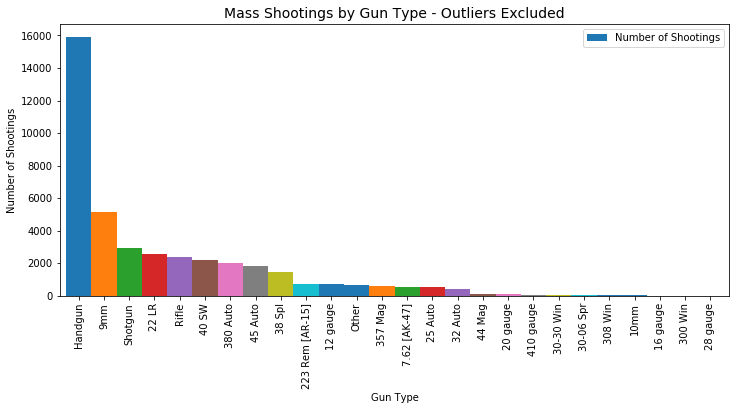

In [11]:
# plot a bar chart of the amount of times each gun was used in a shooting with the unknown outliers excluded
gun_no_outliers.plot.bar("Gun Type", "Number of Shootings", width=1, figsize=(12,5))
plt.title("Mass Shootings by Gun Type - Outliers Excluded", fontsize=14)
plt.xlabel('Gun Type', fontsize=10)
plt.ylabel('Number of Shootings', fontsize=10)

Text(0,0.5,'Number of Shootings')

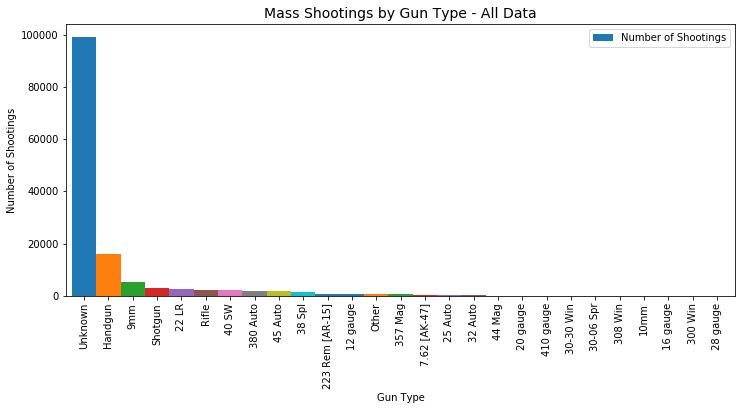

In [12]:
# plot a bar chart of the amount of times each gun was used in a shooting with all guns, including unknowns, included
guns_sorted.plot.bar("Gun Type", "Number of Shootings", width=1, figsize=(12,5))
plt.title("Mass Shootings by Gun Type - All Data", fontsize=14)
plt.xlabel('Gun Type', fontsize=10)
plt.ylabel('Number of Shootings', fontsize=10)

#### As a next step, we decided we wanted to analyze the relationship between gun type and the age of the participants involved in the shootings. We were curious to see if certain guns are associated with higher or lower ages. This could be an indicator of how the age at which you can buy a type of gun effects the rate of use of the gun. 

We started by quickly cleaning up the guns column, using code from above.

In [13]:
# Drop all NaNs in the gun_type column so that it is the same length as teh gun type column from above
no_nans = guns.dropna(axis=0, subset=['gun_type']).reset_index()

In [14]:
# drop the index column from the no_nans dataframe to make it a perfect dataframe
perfect = no_nans.drop(['index'], axis=1)

In [15]:
# Convert the less_colon list from above into an array with the names in the form we want them
cleaned_arr = np.array(less_colon)
# Convert the array with guns into a dataframe of gun type
cleaned_dict = {'gun_type' : cleaned_arr}
column = pd.DataFrame(cleaned_dict)

In [16]:
# replace the cleaned gun type column with the gun type column in the perfect dataframe, calling the new dataframe 
# final
perfect['Gun Type'] = column['gun_type']
final = perfect.drop(['gun_type'], axis=1)

#### Next we cleaned the participant age column to get the average age of the participants included in each shooting

In [17]:
# drop all NaNs from the participant age column in the newly created final dataframe
final_dropna = final.dropna(axis=0, subset=['participant_age']).reset_index()
final_dropped = final_dropna["participant_age"] 

In [18]:
# write a function to split a string by "||"
def split_ages(string):
    return string.split("||")

In [19]:
# apply the split_ages function we just wrote on the participant age column in the final_dropna dataframe
final_dropna["participant_age"] = final_dropna["participant_age"].apply(split_ages)

In [20]:
# Write a for loop in order to go into each row of the participant age column and extract the ages in number form. 
# The for loop is nested so that at every row, the inner for loop goes through the string and takes the last two 
# letters of each element. For the case that the number is a singal digit, we wrote a conditional to account for
# the fact that only the last element in the string is needed
counting = 0
for x in final_dropna["participant_age"]:
    inner_counting = 0
    for i in final_dropna["participant_age"][counting]:
        final_dropna["participant_age"][counting][inner_counting] = final_dropna["participant_age"][counting][inner_counting][-2:]
        if final_dropna["participant_age"][counting][inner_counting][0] == ":":
            final_dropna["participant_age"][counting][inner_counting] = int(final_dropna["participant_age"][counting][inner_counting][1])
            inner_counting += 1
        else:
            final_dropna["participant_age"][counting][inner_counting] = int(final_dropna["participant_age"][counting][inner_counting])
            inner_counting += 1
    counting += 1

In [21]:
# write a function that gets the mean of the numbers in an array
def get_mean(array):
    return np.mean(array)

In [22]:
# apply the get mean function to the participant age column and put the means into a new column called avg participant age
final_dropna["Avg Participant Age"] = final_dropna["participant_age"].apply(get_mean)

In [23]:
# group the average participant age by gun type and sort the values in decending order
gun_age_pt = final_dropna.pivot_table("Avg Participant Age", index = "Gun Type")
gun_age_sort = gun_age_pt.sort_values("Avg Participant Age", ascending = False).reset_index()

Text(0,0.5,'Avg Participant Age')

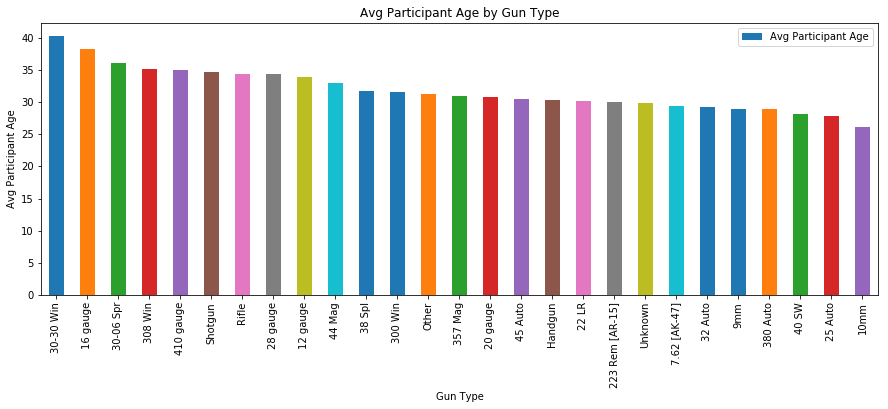

In [24]:
# create a bar graph of the average participant age by each gun type 
gun_age_sort.plot.bar("Gun Type", "Avg Participant Age", figsize = (15, 5))
plt.title("Avg Participant Age by Gun Type")
plt.ylabel("Avg Participant Age")

Based on the bar graph, we can see that the oldest age is associated with the 30-30 Win rifle

In [25]:
# create a variable for the average age of a participant associated with the 30-30 win, the most frequently used gun
# write a print statement for to show the variable 
thirty_win_age = gun_age_sort["Avg Participant Age"][0]
print("The observed average age of a participant using a 30-30 Win firearm is " + str(thirty_win_age))

The observed average age of a participant using a 30-30 Win firearm is 40.276870748299324


#### The next step in our analysis was to compare the average age associated with 30 win rifle to the total distribution of ages across all shootings to see if the 30 win age is significantly higher. We felt that a significant relationship between age and the 30 win could give us insight on potential problems related to age and gun purchasing laws. In order to test this, we ran a hypothesis test to find the significance of the data.

In [26]:
# create a dataframe of the participant age column with all NaNs dropped
final_dropped = final["participant_age"].dropna().reset_index()

In [27]:
# write a nested for loop to split each string in the participant_age column by "||" and then collect each number
# from the elements in the split string into an array called collected num
counter = 0
collect_num = []
for x in final_dropped["participant_age"]:
    split_final = final_dropped["participant_age"][counter].split("||")
    inner_counter = 0
    for i in split_final:
        number = split_final[inner_counter][-2:]
        collect_num.append(number)
        inner_counter += 1   
    counter += 1

In [28]:
# write code to remove any colons from single digit ages
jump = 0
for y in collect_num:
    if collect_num[jump][0] == ":":
        collect_num[jump] = collect_num[jump][1]
        jump += 1
    else:
        jump += 1

In [29]:
# write a function to turn a string into an int
def to_int(string):
    return int(string)

In [30]:
int_vector = np.vectorize(to_int)
int_ages = int_vector(collect_num)

mean = 29.648868358267404
median = 26.0
max = 99
min = 0


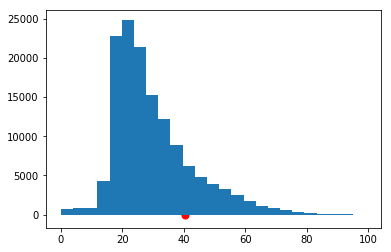

In [31]:
# plot a histogram that shows the distribution of all of the ages of participants involved in the recorded shootings
# also print the mean, median, max and min of the ages
plt.hist(int_ages, bins = 25)
print("mean = " + str(np.mean(int_ages)))
print("median = " + str(np.median(int_ages)))
print("max = " + str(np.max(int_ages)))
print("min = " + str(np.min(int_ages)))
plt.scatter(thirty_win_age, 0, color = "r", s = 50)

We can see from the histogram that the age associated with 30 win rifles is on the higher end, but is it significantly outside the expected range of ages?

In [32]:
# solve for the p-value of the thirty win age being signficantly larger than the distrbution of ages involved in 
# the recorded shootings, then print out the value
p_val = np.sum(int_ages >= thirty_win_age) / len(int_ages)
print("The p-value of our observed statistic is " + str(p_val))

The p-value of our observed statistic is 0.1750291884522506


Based on the fact that the p-value is greater than 0.05, we can see that the age associated with a 30 win rifle is not significantly higher than the expected ages across shootings

#### To go more in depth on what seem the most relevant indicators of shooting trends, we decided to run a multiple regression model. We cleaned and isolated data for 6 predictor variables, n_killed, n_injured, latitude, longitude, n_guns_involved and Avg Participant Age. We felt that these 6 continuous variables might give some light to what factors matter most in shootings. This could help give guidance on appropriate regulation for safer civilian life.

#### We started by cleaning and isolating the 6 predictor variables

In [33]:
# drop and NaNs from the predictor columns that still have NaNs in the data
final_drop = final_dropna.dropna(axis=0, subset=['n_killed'])
final_dropp = final_drop.dropna(axis=0, subset=['n_injured'])
final_droppp = final_dropp.dropna(axis=0, subset=['latitude'])
final_dropppp = final_droppp.dropna(axis=0, subset=['longitude'])
final_droppppp = final_dropppp.dropna(axis=0, subset=['n_guns_involved'])

In [34]:
# rename the the dataframe with dropped NA columns
final_drop_df = final_droppppp

In [35]:
# write a function to get the numerical month from a string and turn it into an int
def get_month(string):
    return int(string[5:7])

In [36]:
# apply the get month function to the column date in order to make a new column labeled "month"
final_drop_df["month"] = final_drop_df["date"].apply(get_month)

In [37]:
# group the cleaned dataframe multiple time, each by city or county but for a different predictor variable
shootings = final_drop_df.groupby("city_or_county").size().reset_index()
killed = final_drop_df.pivot_table("n_killed", index = "city_or_county", aggfunc = sum)
injured = final_drop_df.pivot_table("n_injured", index = "city_or_county", aggfunc = sum)
latitude = final_drop_df.pivot_table("latitude", index = "city_or_county")
longitude = final_drop_df.pivot_table("longitude", index = "city_or_county")
n_guns_involved = final_drop_df.pivot_table("n_guns_involved", index = "city_or_county")
participant_age = final_drop_df.pivot_table("Avg Participant Age", index = "city_or_county")
month = final_drop_df.pivot_table("month", index = "city_or_county")

In [38]:
# write code to merge all of the dataframes for grouped predictor variables into one dataframe
shootings_df = pd.merge(shootings, killed, on = "city_or_county")
shootings_dff = pd.merge(shootings_df, injured, on = "city_or_county")
shootings_dfff = pd.merge(shootings_dff, latitude, on = "city_or_county")
shootings_dffff = pd.merge(shootings_dfff, longitude, on = "city_or_county")
shootings_dfffff = pd.merge(shootings_dffff, n_guns_involved, on = "city_or_county")
shootings_dffffff = pd.merge(shootings_dfffff, participant_age, on = "city_or_county")
shootings_dfffffff = pd.merge(shootings_dffffff, month, on = "city_or_county")

In [39]:
# rename the merged dataframe
shootings_final = shootings_dfffffff

In [40]:
#create a dataframe of the independent variables
X = shootings_final[['n_killed', 'n_injured', "latitude", "longitude", "n_guns_involved", "Avg Participant Age"]]
#dependent variable. What are we predicting?
y = shootings_final[0]

#we are fitting y = ax_1 _bx_2 + c and not just ax_1 + bx_2
X = sm.add_constant(X) 

#OLS - ordinary least squares.
#best possible high dimensional line through the data
# best = minimize sum of square distances
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                 3.896e+04
Date:                Thu, 29 Oct 2020   Prob (F-statistic):               0.00
Time:                        06:15:27   Log-Likelihood:                -36027.
No. Observations:                8860   AIC:                         7.207e+04
Df Residuals:                    8853   BIC:                         7.212e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.1110      1.364      0.815      0.415      -1.562       3.784
n_killed                1.2763      0.013     94.967      0.000       1.250       1.303
n_injured               0.7682      0.004    178.229      0.000       0.760       0.777
latitude                0.1376      0.028      4.961      0.000       0.083       0.192
longitude               0.0277      0.009      2.933      0.003       0.009       0.046
n_guns_involved         0.0318      0.054      0.592      0.554      -0.073       0.137
Avg Participant Age    -0.0571      0.013     -4.486      0.000      -0.082      -0.032
==============================================================================
Omnibus:                    18184.243   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        132256722.195
Skew:                          16.855   Prob(JB):                         0.00
Kurtosis:                     600.596   Cond. No.                         958.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the multiple linear regression model, we interpret some interesting indicators. For one, the high Rsquared of 0.964 tells us that 96% of the variation of the model is explained by the chosen predictor variables. Furthermore, the Prob(F-statistic) tells us that it was worth running this model because its effects are significant. When looking at the individual predictor variables, all of the variables are significant to include exc ept for the number of guns involved. Its p-value is above 0.05. Although the other predictors are all significant, they are seem to have relatively little per unit impact on the number of shootings. The highest coefficient, n_killed, tells us that with every 1 unit increase in the number of people killed, the number of shootings is expected to go up in a city by 1.27. This is expected due to what we know between shootings and deaths. Another interesting coefficient is the Avg Participant Age which suggest that shootings seem to go down as age goes up. 

#### Another analysis that we decided to conduct was seeing whether shootings have any association with the time of the year. To do this, we calculated a distribution of shootings across each month and each day of the month. 

In [41]:
# create a function to get the day of the month in integer form
def get_day(string):
    return int(string[-2:])

In [42]:
# apply the get day function to the date column to make a new column labeled "day"
final_drop_df["day"] = final_drop_df["date"].apply(get_day)

<BarContainer object of 31 artists>

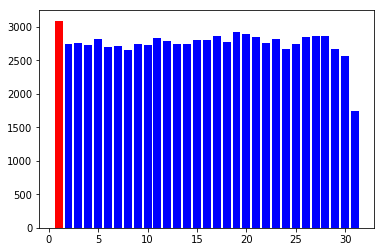

In [43]:
# plot a bar graph of the amount of shootings on each day of the month
days = final_drop_df.groupby("day").size().reset_index()
plt.bar(days["day"], days[0], color = ("red", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", 
                                       "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", 
                                       "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", 
                                       "blue", "blue", "blue", "blue"))

Based on this bar graph of the number of shootings on each day of the month, we see that the amount is pretty conistent across the days, however, there is a outstanding peak on the 1st of each month (highlighted red). In order to see whether or not this outcome on the first day is significantly larger, we built a 95% confidence interval to see if the observed result was inside the expected range of values.

In [44]:
# solve the mean, std deviation and std error of the day data
day_mean_month_shootings = np.mean(days[0])
day_std_dev = np.std(days[0])
day_std_error = day_std_dev / (np.sqrt(len(days[0])))

In [45]:
# get the lower and upper bounds of the 95% confidence interval
day_upper_bound = day_mean_month_shootings + 2.042 * day_std_error
day_lower_bound = day_mean_month_shootings - 2.042 * day_std_error

In [46]:
# print the 95% confidence interval
print("The 95% confidence interval for the distribution of shootings per day of the month is " + "(" +
      str(day_lower_bound) + " , " + str(day_upper_bound) + ")")

The 95% confidence interval for the distribution of shootings per day of the month is (2672.072675716406 , 2823.282162993271)


In [47]:
# make the 1st day shooting amount a variable and print it
first_day = days[0][0]
print(first_day)

3089


The amount of shootings on the first of a month, 3,089 is significantly larger than the expected amount as it is larger than the upper bound of the 95% confidence interval.

In [48]:
# create a month column in final_drop_df
final_drop_df["month"] = final_drop_df["date"].apply(get_month)

<BarContainer object of 12 artists>

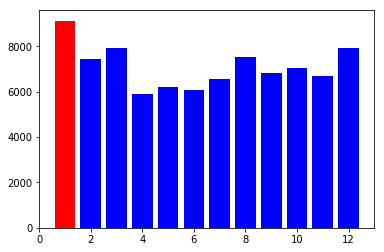

In [49]:
# plot a histogram of the distribution of shootings across each month
months = final_drop_df.groupby("month").size().reset_index()
plt.bar(months["month"], months[0], color = ("red", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", 
                                       "blue", "blue", "blue"))

Based on the bar graph, we can see that the winter season seems to have the most amount of shootings per month, with the largest amount being in January. This was surprising to us due to the cold weather. We decided to build a confidence interval to see if the amount of shootings in January is significantly more than expected.

In [50]:
# get the mean, standard deviation and standard error of the months distribution
mean_month_shootings = np.mean(months[0])
month_std_dev = np.std(months[0])
month_std_error = month_std_dev / (np.sqrt(len(months[0])))

In [51]:
# get the upper and lower bounds of the 95% confidence interval for shootings per month
month_upper_bound = mean_month_shootings + 2.201 * month_std_error
month_lower_bound = mean_month_shootings - 2.201 * month_std_error

In [52]:
# print the 95% confidence interval
print("The 95% confidence interval for the distribution of shootings per month is " + "(" +
      str(month_lower_bound) + " , " + str(month_upper_bound) + ")")

The 95% confidence interval for the distribution of shootings per month is (6529.2140302750395 , 7667.1193030582945)


In [53]:
# make the January shooting amount a variable and print it
January_shootings = months[0][0]
print(January_shootings)

9124


The amount of shootings in January seems to be significantly more than the expected amount per month, as it is higher than the upper bound of the 95% confidence interval.

#### The last full analysis that we conducted was using plotly to show a graphic of the distribution of shootings across states in the country. The code below shows our progression toward creating a map of the United States with shooting amounts and color frequencies to highlight each state's shootings occurences.

In [54]:
# group the number of shootings by state and sort the dataframe
state_shootings = guns.groupby("state").size().reset_index()
state_df = state_shootings.sort_values(0, ascending = False)

In [55]:
# create a dataframe with abbreviations for each state
abrevs = pd.read_csv('abrevs.csv')
abrevs.head()

,state,abrev
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [56]:
state_df.head()

,state,0
13,Illinois,17556
4,California,16306
9,Florida,15029
43,Texas,13577
35,Ohio,10244


In [57]:
# clean the state_df dataframe and rename state
state_df['abrevs'] = abrevs['abrev']
state = state_df.rename(columns = {0 : 'num_shootings'})

In [58]:
# import plotly 
import plotly.plotly as py

import plotly

plotly.tools.set_credentials_file(username='annacalla14', api_key = 'xRlNCUNsHm0MpipclW23')

import pandas as pd

In [59]:
# plot the graph of the United States with highlighted shootings per state
color_scale = [[0.0, 'RGB(16,78,139)'],[1.0, 'RGB(220,20,60)']]
data = [ dict(
        type = 'choropleth',
        colorscale = color_scale,
        autocolorscale = False,
        locations = state['abrevs'],
        z = state['num_shootings'],
        locationmode = 'USA-states',
        text = state['num_shootings'],
        colorbar = dict (
            title = 'Number of Shootings')
        )  ]
layout = dict(
        title = 'Instances of Gun Violence per State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(235,235,235)'),
)
fig = dict( data=data, layout=layout)
py.iplot( fig, filename='gun-violence')

PlotlyRequestError: Aw, snap! You tried to use our API as the user 'annacalla14', but the supplied API key doesn't match our records. You can view your API key at https://plotly.com/settings/api

You're most likely getting this message because your local credentials file isn't synced with the Plotly server you're communicating with.

Go to https://plotly.com/<language>/getting-started (e.g., https://plotly.com/python/getting-started) for more information.

Make sure that you're logged in as annacalla14.

Need help? Please try searching Plotly's <a href='http://stackoverflow.com/questions/tagged/plotly'>Stack Overflow channel</a>.

#### The rest of the code below shows other investigations that we conducted during our work on the project, however, these findings were not as interesting or relevant to our hypotheses. 

Plot a bar graph of the average age of participants per state

In [ ]:
participant_pt = final_dropna.pivot_table("Avg Participant Age", index = "state")
sorted_age_by_state = participant_pt.sort_values("Avg Participant Age", ascending = False).reset_index()
sorted_age_by_state.plot.bar("state", "Avg Participant Age", figsize = (15, 5))

In [ ]:
states_total = final.groupby("state")
sorted_states_total = states_total.size().reset_index().sort_values(0, ascending = False)

In [ ]:
congress_pt = final_dropna.pivot_table("Avg Participant Age", index = "congressional_district")
sorted_congress_districts = congress_pt.sort_values("Avg Participant Age", ascending = False)

In [ ]:
guns_type_pt = final.pivot_table("n_killed", index = "Gun Type")
guns_sorted = guns_type_pt.sort_values("n_killed", ascending = False)

Plot a log distribution for normal and standardized killings across all cities in the country

In [ ]:
cities_type_pt = final.pivot_table("n_killed", index = "city_or_county", aggfunc = "count")
cities_sorted = cities_type_pt.sort_values("n_killed", ascending = False)
def standardize(casualties):
    return casualties / 1000
cities_standard = cities_sorted["n_killed"].apply(standardize).reset_index()
plt.hist(np.log(cities_sorted["n_killed"]))
plt.hist(np.log(cities_standard["n_killed"]))

# We hope you enjoyed our findings. Thank you for a great semester! 